In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kmeans import KMeans

In [2]:
def read_present_data(synthetic_data = False):

        df_customers = pd.read_csv('../datasets/Mall_Customers.csv') 
        df_customers.drop(['CustomerID', 'Gender'], axis=1, inplace=True)
        
        # Additional synthetic columns
        df_customers['Number of Purchases'] = np.random.randint(1, 20, size=len(df_customers))
        df_customers['Average Purchase Amount'] = np.round(np.random.uniform(10, 1000, size=len(df_customers)), 2)
        
        if synthetic_data:
            synthetic_data_size = 800
            # Additional synthetic rows
            new_rows = {
                'Age': np.random.randint(df_customers['Age'].min(), df_customers['Age'].max(), size=synthetic_data_size),
                'Annual Income (k$)': np.random.randint(df_customers['Annual Income (k$)'].min(), df_customers['Annual Income (k$)'].max(), size=synthetic_data_size),
                'Spending Score (1-100)': np.random.randint(df_customers['Spending Score (1-100)'].min(), df_customers['Spending Score (1-100)'].max(), size=synthetic_data_size),
                'Number of Purchases': np.random.randint(df_customers['Number of Purchases'].min(), df_customers['Number of Purchases'].max(), size=synthetic_data_size),
                'Average Purchase Amount': np.random.uniform(df_customers['Average Purchase Amount'].min(), df_customers['Average Purchase Amount'].max(), size=synthetic_data_size),
            }
            # Concatenate the new data to the existing DataFrame
            df_customers = pd.concat([df_customers, pd.DataFrame(new_rows)], ignore_index=True)

        return df_customers
    

In [3]:
df_customers = read_present_data()
df_customers

,Age,Annual Income (k$),Spending Score (1-100),Number of Purchases,Average Purchase Amount
0,19,15,39,10,675.21
1,21,15,81,5,934.51
2,20,16,6,16,563.31
3,23,16,77,1,675.72
4,31,17,40,18,86.28
...,...,...,...,...,...
195,35,120,79,7,134.99
196,45,126,28,10,161.66
197,32,126,74,9,350.37
198,32,137,18,17,18.38


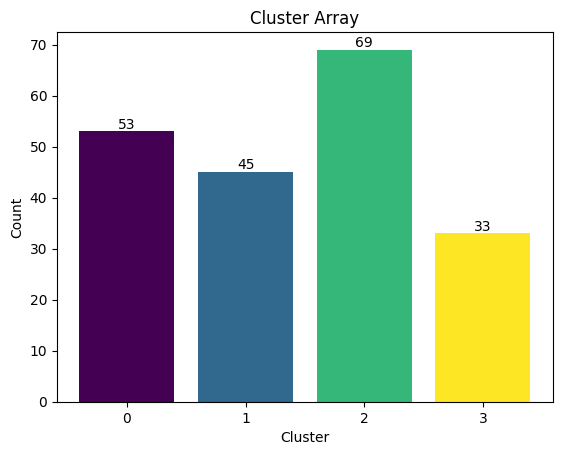

Cluster Array
 [1 1 1 1 2 1 2 0 2 0 2 1 2 1 2 1 1 1 2 0 2 1 2 1 2 1 2 2 2 1 2 1 2 1 2 1 2
 1 2 0 2 1 2 1 2 1 2 1 1 1 2 0 0 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 0 0 2 0 2 2 2 2 2 1 2 2 0 0 2 2 1 2 2 1 1 2 1 2 1 0 2 2 1 2 1 2 2 2 2 2
 1 2 1 1 0 2 2 2 2 0 0 0 0 1 0 3 0 2 0 3 0 1 0 3 0 3 0 3 0 3 0 0 1 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 1 2 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]
Cluster Centroids
 [[-0.51603456  0.56774629  0.94940502 -0.46001485 -0.31968227]
 [-1.01852461 -0.66434701  0.41650228  0.1931239   0.60021636]
 [ 0.99635684 -0.52124805 -0.38488672  0.16809917 -0.2096637 ]
 [ 0.13438841  1.08397507 -1.28799652  0.12398089  0.13333997]]


In [9]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'random', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers, scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=False, plot_data=False)

print("Cluster Array\n", kmeans.get_cluster_array(visualize=True))
print("Cluster Centroids\n", kmeans.get_centroids())

Cluster Array
 [0 0 1 0 2 0 1 0 1 0 1 0 2 0 1 0 1 0 2 0 2 0 1 0 2 0 1 2 1 0 1 0 1 0 2 0 1
 0 2 0 1 0 2 0 2 0 2 0 0 0 1 2 0 2 1 2 2 2 0 2 2 0 2 1 2 0 2 1 0 0 2 1 1 2
 1 0 2 1 0 2 2 2 2 1 0 1 1 0 0 1 2 0 2 2 0 0 2 0 2 0 0 2 1 0 2 0 1 1 2 2 2
 0 3 0 0 0 2 1 2 2 0 2 0 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 3 0 2 0 0 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 2 0 3 0 2 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


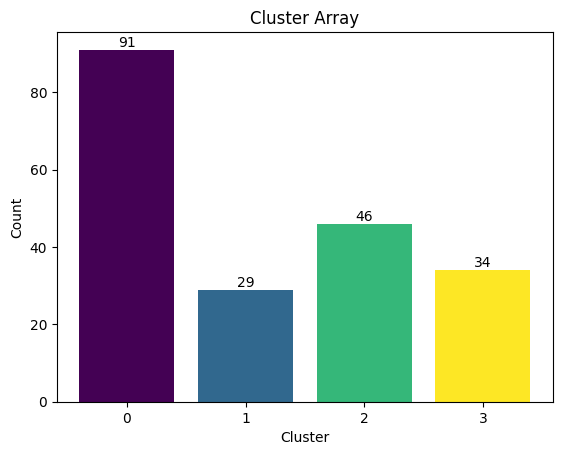

200
Cluster Centroids
 [[-0.7625594   0.03641704  0.79908407 -0.16446066  0.09033751]
 [ 0.85003448 -0.73947364 -0.60463454  0.52627334  0.81966248]
 [ 0.96938201 -0.37143559 -0.29565226 -0.1804596  -0.8848251 ]
 [ 0.00442155  1.03578887 -1.2230072   0.23544513  0.25620674]]


In [7]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'kmeans++', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers, scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=False, plot_data=False)

print("Cluster Array\n", kmeans.get_cluster_array())
print("Cluster Centroids\n", kmeans.get_centroids())